In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Arbitrary Value Imputation

this technique was derived from kaggle competition
it consists of replacing NAN by an arbitrary value

In [2]:
df = pd.read_csv('Titanic_dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [3]:
def impute_nan(df,variable):
    df[variable+'Zero']=df[variable].fillna(0)
    df[variable+'hundred']=df[variable].fillna(100)

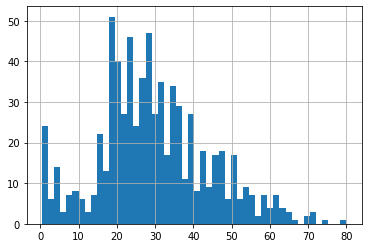

In [4]:
df['Age'].hist(bins=50)

### Arbitrary values
1. It should not be more frequently present
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one 

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important , it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

#### how to handle categroical Missing Values

Frequent Category Imputation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [7]:
df=pd.read_csv('house_price_prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice
0        Gd         NaN     Attchd     208500
1        Gd          TA     Attchd     181500
2        Gd          TA     Attchd     223500
3        TA          Gd     Detchd     140000
4        Gd          TA     Attchd     250000
5        Gd         NaN     Attchd     143000
6        Ex          Gd     Attchd     307000
7        Gd          TA     Attchd     200000
8        TA          TA     Detchd     129900
9        TA          TA     Attchd     118000
10       TA         NaN     Detchd     129500
11       Ex          Gd    BuiltIn     345000
12       TA         NaN     Detchd     144000
13       Gd          Gd     Attchd     279500
14       TA          Fa     Attchd     157000
15       TA         NaN     Detchd     132000
16       TA          TA     Attchd     149000
17      NaN         NaN    CarPort      90000
18       TA         NaN     Detchd     159000
19       TA         NaN     Attchd     139000

In [8]:
df.shape

(1460, 4)

In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

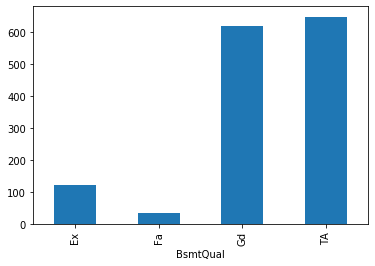

In [12]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

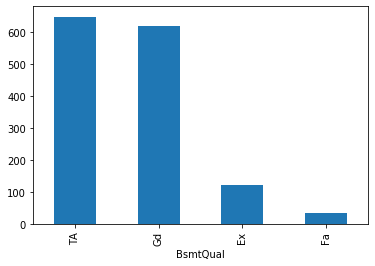

In [13]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

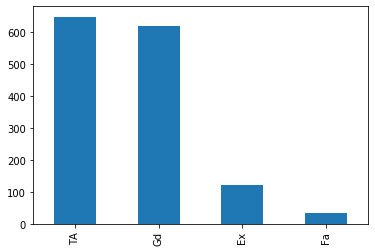

In [14]:
df['BsmtQual'].value_counts().plot.bar()

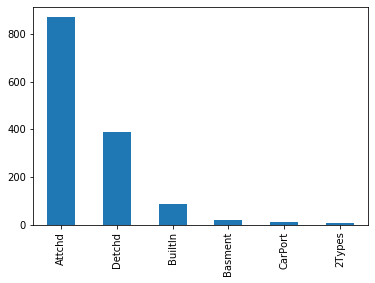

In [15]:
df['GarageType'].value_counts().plot.bar()

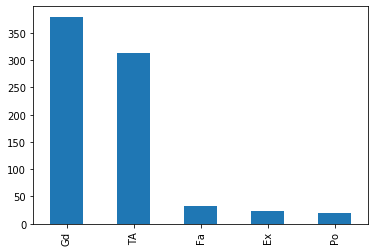

In [16]:
df['FireplaceQu'].value_counts().plot.bar()

In [17]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [18]:
df['GarageType'].mode()[0]

'Attchd'

In [19]:
### Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
    

In [20]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [21]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd          Gd     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [22]:
df.isnull().sum(
)

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages
1.Easy to implement
2.Faster way o implement

#### Disadvantages
1.Since we are using the more frequent labels, it may use them in an over represented way, if there are many nan
2.it distorts the relation of the most frequent labels

#### Adding a variable to captute NAN

In [23]:
df=pd.read_csv('house_price_prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice
0        Gd         NaN     Attchd     208500
1        Gd          TA     Attchd     181500
2        Gd          TA     Attchd     223500
3        TA          Gd     Detchd     140000
4        Gd          TA     Attchd     250000
5        Gd         NaN     Attchd     143000
6        Ex          Gd     Attchd     307000
7        Gd          TA     Attchd     200000
8        TA          TA     Detchd     129900
9        TA          TA     Attchd     118000
10       TA         NaN     Detchd     129500
11       Ex          Gd    BuiltIn     345000
12       TA         NaN     Detchd     144000
13       Gd          Gd     Attchd     279500
14       TA          Fa     Attchd     157000
15       TA         NaN     Detchd     132000
16       TA          TA     Attchd     149000
17      NaN         NaN    CarPort      90000
18       TA         NaN     Detchd     159000
19       TA         NaN     Attchd     139000

In [24]:
df['BasmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [25]:
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice  BasmtQual_var
0        Gd         NaN     Attchd     208500              0
1        Gd          TA     Attchd     181500              0
2        Gd          TA     Attchd     223500              0
3        TA          Gd     Detchd     140000              0
4        Gd          TA     Attchd     250000              0
5        Gd         NaN     Attchd     143000              0
6        Ex          Gd     Attchd     307000              0
7        Gd          TA     Attchd     200000              0
8        TA          TA     Detchd     129900              0
9        TA          TA     Attchd     118000              0
10       TA         NaN     Detchd     129500              0
11       Ex          Gd    BuiltIn     345000              0
12       TA         NaN     Detchd     144000              0
13       Gd          Gd     Attchd     279500              0
14       TA          Fa     Attchd     157000              0
15       TA         NaN     Detchd     132000              0
16       TA          TA     Attchd     149000              0
17      NaN         NaN    CarPort      90000              1
18       TA         NaN     Detchd     159000              0
19       TA         NaN     Attchd     139000              0

In [26]:
frequent=df['BsmtQual'].mode()[0]

In [27]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [28]:
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice  BasmtQual_var
0        Gd         NaN     Attchd     208500              0
1        Gd          TA     Attchd     181500              0
2        Gd          TA     Attchd     223500              0
3        TA          Gd     Detchd     140000              0
4        Gd          TA     Attchd     250000              0
5        Gd         NaN     Attchd     143000              0
6        Ex          Gd     Attchd     307000              0
7        Gd          TA     Attchd     200000              0
8        TA          TA     Detchd     129900              0
9        TA          TA     Attchd     118000              0
10       TA         NaN     Detchd     129500              0
11       Ex          Gd    BuiltIn     345000              0
12       TA         NaN     Detchd     144000              0
13       Gd          Gd     Attchd     279500              0
14       TA          Fa     Attchd     157000              0
15       TA         NaN     Detchd     132000              0
16       TA          TA     Attchd     149000              0
17       TA         NaN    CarPort      90000              1
18       TA         NaN     Detchd     159000              0
19       TA         NaN     Attchd     139000              0

In [29]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [30]:
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice  BasmtQual_var  FireplaceQu_var
0        Gd          Gd     Attchd     208500              0                1
1        Gd          TA     Attchd     181500              0                0
2        Gd          TA     Attchd     223500              0                0
3        TA          Gd     Detchd     140000              0                0
4        Gd          TA     Attchd     250000              0                0
5        Gd          Gd     Attchd     143000              0                1
6        Ex          Gd     Attchd     307000              0                0
7        Gd          TA     Attchd     200000              0                0
8        TA          TA     Detchd     129900              0                0
9        TA          TA     Attchd     118000              0                0
10       TA          Gd     Detchd     129500              0                1
11       Ex          Gd    BuiltIn     345000              0                0
12       TA          Gd     Detchd     144000              0                1
13       Gd          Gd     Attchd     279500              0                0
14       TA          Fa     Attchd     157000              0                0
15       TA          Gd     Detchd     132000              0                1
16       TA          TA     Attchd     149000              0                0
17       TA          Gd    CarPort      90000              1                1
18       TA          Gd     Detchd     159000              0                1
19       TA          Gd     Attchd     139000              0                1

#### suppose if you have more frequent categories we just replace NAN with a new category

In [31]:
df=pd.read_csv('house_price_prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice
0        Gd         NaN     Attchd     208500
1        Gd          TA     Attchd     181500
2        Gd          TA     Attchd     223500
3        TA          Gd     Detchd     140000
4        Gd          TA     Attchd     250000
5        Gd         NaN     Attchd     143000
6        Ex          Gd     Attchd     307000
7        Gd          TA     Attchd     200000
8        TA          TA     Detchd     129900
9        TA          TA     Attchd     118000
10       TA         NaN     Detchd     129500
11       Ex          Gd    BuiltIn     345000
12       TA         NaN     Detchd     144000
13       Gd          Gd     Attchd     279500
14       TA          Fa     Attchd     157000
15       TA         NaN     Detchd     132000
16       TA          TA     Attchd     149000
17      NaN         NaN    CarPort      90000
18       TA         NaN     Detchd     159000
19       TA         NaN     Attchd     139000

In [32]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [35]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [36]:
df.head(20)

BsmtQual FireplaceQu GarageType  SalePrice BsmtQualnewvar  \
0        Gd         NaN     Attchd     208500             Gd   
1        Gd          TA     Attchd     181500             Gd   
2        Gd          TA     Attchd     223500             Gd   
3        TA          Gd     Detchd     140000             TA   
4        Gd          TA     Attchd     250000             Gd   
5        Gd         NaN     Attchd     143000             Gd   
6        Ex          Gd     Attchd     307000             Ex   
7        Gd          TA     Attchd     200000             Gd   
8        TA          TA     Detchd     129900             TA   
9        TA          TA     Attchd     118000             TA   
10       TA         NaN     Detchd     129500             TA   
11       Ex          Gd    BuiltIn     345000             Ex   
12       TA         NaN     Detchd     144000             TA   
13       Gd          Gd     Attchd     279500             Gd   
14       TA          Fa     Attchd     157000             TA   
15       TA         NaN     Detchd     132000             TA   
16       TA          TA     Attchd     149000             TA   
17      NaN         NaN    CarPort      90000        Missing   
18       TA         NaN     Detchd     159000             TA   
19       TA         NaN     Attchd     139000             TA   

   FireplaceQunewvar GarageTypenewvar  
0            Missing           Attchd  
1                 TA           Attchd  
2                 TA           Attchd  
3                 Gd           Detchd  
4                 TA           Attchd  
5            Missing           Attchd  
6                 Gd           Attchd  
7                 TA           Attchd  
8                 TA           Detchd  
9                 TA           Attchd  
10           Missing           Detchd  
11                Gd          BuiltIn  
12           Missing           Detchd  
13                Gd           Attchd  
14                Fa           Attchd  
15           Missing           Detchd  
16                TA           Attchd  
17           Missing          CarPort  
18           Missing           Detchd  
19           Missing           Attchd

In [39]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [41]:
df.head(20)

SalePrice BsmtQualnewvar FireplaceQunewvar GarageTypenewvar
0      208500             Gd           Missing           Attchd
1      181500             Gd                TA           Attchd
2      223500             Gd                TA           Attchd
3      140000             TA                Gd           Detchd
4      250000             Gd                TA           Attchd
5      143000             Gd           Missing           Attchd
6      307000             Ex                Gd           Attchd
7      200000             Gd                TA           Attchd
8      129900             TA                TA           Detchd
9      118000             TA                TA           Attchd
10     129500             TA           Missing           Detchd
11     345000             Ex                Gd          BuiltIn
12     144000             TA           Missing           Detchd
13     279500             Gd                Gd           Attchd
14     157000             TA                Fa           Attchd
15     132000             TA           Missing           Detchd
16     149000             TA                TA           Attchd
17      90000        Missing           Missing          CarPort
18     159000             TA           Missing           Detchd
19     139000             TA           Missing           Attchd